In [2]:
import pandas as pd

In [5]:
A = pd.read_csv(r"C:\Users\gisse\Downloads\SalmonsTrain.csv") #Train

In [6]:
B = pd.read_csv(r"C:\Users\gisse\Downloads\SalmonsTest.csv") #Test

In [14]:
C = pd.read_csv(r"C:\Users\gisse\Downloads\SalmonsValidation.csv") #Validations

In [15]:
C

,Customer,Spending,Card,Coupon
0,939,2186,0,No
1,746,5969,1,Yes
2,214,3556,1,No
3,803,4838,1,Yes
4,551,2492,1,No
...,...,...,...,...
295,710,2325,0,No
296,19,2936,0,No
297,283,1395,1,No
298,634,1747,1,No


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

C = pd.read_csv(r"C:\Users\gisse\Downloads\SalmonsValidation.csv")

y = C['Coupon']

X = C.drop(['Customer', 'Coupon'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on Validation Set: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_val, y_pred))

coefficients = model.coef_[0]
intercept = model.intercept_[0]

equation = f"Final Model Equation: P(Coupon=1) = 1 / (1 + e^({intercept} + {coefficients[0]} * Spending + {coefficients[1]} * Card + ...))"
print(equation)

Accuracy on Validation Set: 0.92
Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.96      0.95        51
         Yes       0.75      0.67      0.71         9

    accuracy                           0.92        60
   macro avg       0.85      0.81      0.83        60
weighted avg       0.91      0.92      0.91        60

Final Model Equation: P(Coupon=1) = 1 / (1 + e^(-8.816363694600636 + 0.001307350518639155 * Spending + 3.149267583066999 * Card + ...))


In [19]:
print("It looks like a good logistic regression model with an accuracy of 92% on the validation set. The classification report provides additional insights into precision, recall, and F1-score for each class ('No' and 'Yes'). In this case, 'No' seems to have higher precision, recall, and F1-score compared to 'Yes,' indicating better performance for the 'No' class.")

It looks like a good logistic regression model with an accuracy of 92% on the validation set. The classification report provides additional insights into precision, recall, and F1-score for each class ('No' and 'Yes'). In this case, 'No' seems to have higher precision, recall, and F1-score compared to 'Yes,' indicating better performance for the 'No' class.


In [20]:
B

,Customer,Spending,Card,Coupon
0,592,3452,1,No
1,379,2455,0,No
2,101,3685,0,No
3,364,3449,1,No
4,299,4349,0,No
...,...,...,...,...
195,424,2506,1,No
196,149,2719,1,No
197,779,1634,0,No
198,406,13645,1,Yes


In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

y_test = B['Coupon']
X_test = B.drop(['Customer', 'Coupon'], axis=1) 

print("Unique values in 'Coupon' column:", y_test.unique())

y_probabilities = model.predict_proba(X_test)[:, 1]

predictions = pd.DataFrame({'Probability': y_probabilities, 'Actual': y_test})

predictions = predictions.sort_values(by='Probability', ascending=False)

top_10_percent = predictions.head(int(0.1 * len(predictions)))

print("Unique values in 'Actual' column (top 10%):", top_10_percent['Actual'].unique())

actual_coupon_usage_rate_top_10 = top_10_percent['Actual'].mean()

overall_coupon_usage_rate = predictions['Actual'].mean()

lift = actual_coupon_usage_rate_top_10 / overall_coupon_usage_rate

print(f"Lift on the top 10%: {lift:.2f}")


Unique values in 'Coupon' column: ['No' 'Yes']
Unique values in 'Actual' column (top 10%): ['Yes' 'No']


TypeError: Could not convert string 'YesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYes' to numeric

In [25]:
print("Unique values in 'Coupon' column:")
print(y_test.value_counts())

Unique values in 'Coupon' column:
Coupon
No     163
Yes     37
Name: count, dtype: int64


In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'B' is your test set DataFrame
# Make sure you replace 'Spending', 'Card', etc. with the actual column names in your dataset

# Assuming 'Coupon' is your target variable
y_test = B['Coupon']
X_test = B.drop(['Customer', 'Coupon'], axis=1)  # Adjust column names accordingly

# Make predictions on the test set
y_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"Area under the ROC curve: {roc_auc:.2f}")

# Calculate the ROC curve to find the sensitivity at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Find the threshold corresponding to a sensitivity of at least 0.80
desired_sensitivity = 0.80
index = next(i for i, value in enumerate(tpr) if value >= desired_sensitivity)
threshold_at_desired_sensitivity = thresholds[index]

# Calculate the Class 0 error rate at the found threshold
class_0_error_rate = fpr[index]

print(f"To achieve a sensitivity of at least {desired_sensitivity:.2f},"
      f" the Class 0 error rate must be tolerated: {class_0_error_rate:.2f}")

Area under the ROC curve: 0.92


ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

y_probabilities = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test_binary, y_probabilities)
print(f"Area under the ROC curve: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test_binary, y_probabilities)

desired_sensitivity = 0.80
index = next(i for i, value in enumerate(tpr) if value >= desired_sensitivity)
threshold_at_desired_sensitivity = thresholds[index]

class_0_error_rate = fpr[index]

print(f"To achieve a sensitivity of at least {desired_sensitivity:.2f},"
      f" the Class 0 error rate must be tolerated: {class_0_error_rate:.2f}")

Area under the ROC curve: 0.92
To achieve a sensitivity of at least 0.80, the Class 0 error rate must be tolerated: 0.07


Area under the ROC curve: 0.92


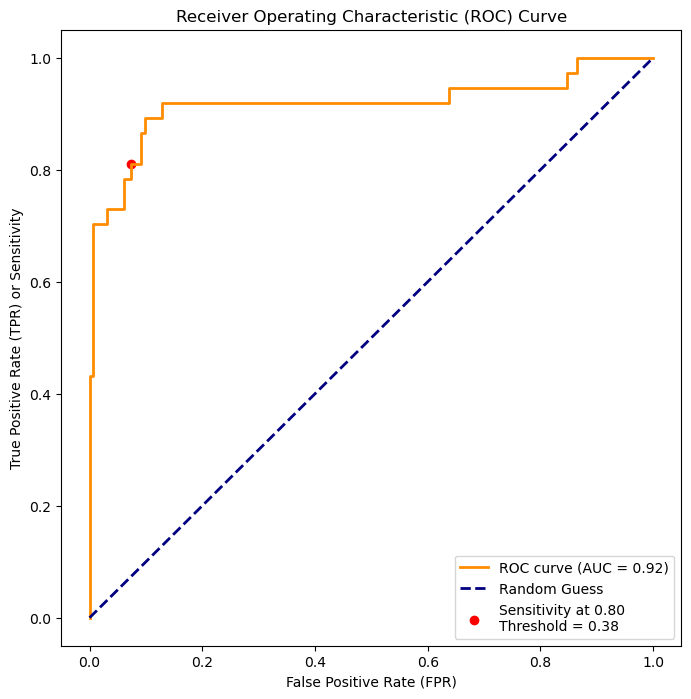

In [30]:
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

y_probabilities = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test_binary, y_probabilities)
print(f"Area under the ROC curve: {roc_auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test_binary, y_probabilities)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.scatter(fpr[index], tpr[index], marker='o', color='red', label=f'Sensitivity at 0.80\nThreshold = {threshold_at_desired_sensitivity:.2f}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()